# Часть 1. Анализ и подготовка данных
* Исследование данных
* Проверка на полноту и наличие некорректных значений
* Подготовка итоговой витрины данных для сегментации

### Осмотр данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import os
import regex
import warnings

pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True
pd.options.mode.chained_assignment = None

from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path, sep=';')
df.columns = [col.lower() for col in df.columns]
df.head(-5)

,номер варианта,id,income_base_type,credit_purpose,insurance_flag,dti,sex,full_age_child_number,dependant_number,education,empl_type,empl_size,bankaccount_flag,period_at_work,age,empl_property,empl_form,family_status,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_accountactive180,num_accountactive90,num_accountactive60,active_to_all_prc,numaccountactiveall,numaccountclosed,sum_of_paym_months,all_credits,active_not_cc,own_closed,min_mnthafterloan,max_mnthafterloan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,17,1000017,2НДФЛ,Покупка недвижимости/ строительство,1,0.24,женский,0,0,высшее,специалист,>250,0.00,108.00,31.00,Наука,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,1000037,Поступление зарплаты на счет,Покупка автомобиля,1,0.44,женский,0,0,среднее-специальное,рабочий,>250,0.00,7.00,32.00,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,1000057,Поступление зарплаты на счет,Ремонт,1,0.49,мужской,0,0,среднее,вспомогательный персонал,>100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,1000077,Поступление зарплаты на счет,Покупка автомобиля,1,0.51,мужской,0,0,среднее-специальное,рабочий,>250,1.00,84.00,43.00,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,1000097,Поступление зарплаты на счет,Ремонт,0,0.36,женский,0,0,высшее,специалист,>250,0.00,57.00,27.00,Информационные технологии,ООО,холост / не замужем,1.00,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,17,1204657,Форма банка (без печати работодателя),Ремонт,1,0.35,женский,2,0,высшее,специалист,>250,0.00,51.00,34.00,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10233,17,1204677,Свободная форма с печатью работодателя,Ремонт,1,0.39,мужской,0,0,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,>250,0.00,10.00,34.00,Транспорт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10234,17,1204697,Поступление зарплаты на счет,Ремонт,0,0.32,женский,0,0,высшее,менеджер среднего звена,>250,0.00,63.00,30.00,Государственная служба,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10235,17,1204717,Поступление зарплаты на счет,Покупка недвижимости/ строительство,0,0.53,женский,0,0,высшее,менеджер среднего звена,>250,1.00,7.00,31.00,Торговля,Индивидуальный предприниматель,женат / замужем,1.00,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Описание данных

In [ ]:
with pd.option_context('display.max_colwidth', 200):
  desc = pd.read_excel('/content/drive/MyDrive/work/portfolio/МАБД/ДЗ1/Описание переменных.xlsx').iloc[:,:-1]
  display(desc)

,Атрибуты,Описание
0,Номер варианта,Номер варианта
1,ID,Идентификатор клиента
2,INCOME_BASE_TYPE,Подтверждение дохода
3,CREDIT_PURPOSE,Цель получения кредита
4,INSURANCE_FLAG,Страхование заемщика при получении кредита
5,DTI,debt-to-income ratio — отношение долга к доходам
6,SEX,Пол
7,FULL_AGE_CHILD_NUMBER,Кол-во лет ребенку
8,DEPENDANT_NUMBER,Кол-во иждивенцев
9,EDUCATION,Образование


`id` и `Номер варианта` нам не понадобятся, удалим эти переменные

In [ ]:
df = df.drop(['id', 'номер варианта'], axis=1)

### Замена пропусков

Доля пропусков в переменных

In [ ]:
df.isna().sum()[df.isna().sum() > 0] / df.shape[0]

income_base_type       0.01
dti                    0.01
empl_type              0.00
empl_size              0.01
bankaccount_flag       0.23
period_at_work         0.23
age                    0.23
empl_property          0.23
empl_form              0.61
family_status          0.61
max90days              0.61
max60days              0.61
max30days              0.61
max21days              0.61
max14days              0.61
avg_num_delay          0.64
if_zalog               0.64
num_accountactive180   0.64
num_accountactive90    0.64
num_accountactive60    0.64
active_to_all_prc      0.64
numaccountactiveall    0.64
numaccountclosed       0.64
sum_of_paym_months     0.64
all_credits            0.64
active_not_cc          0.64
own_closed             0.64
min_mnthafterloan      0.64
max_mnthafterloan      0.64
dlq_exist              0.64
thirty_in_a_year       0.64
sixty_in_a_year        0.64
ninety_in_a_year       0.64
thirty_vintage         0.64
sixty_vintage          0.64
ninety_vintage      

Мы видим, что у большого количества переменных слишком большая доля пропусков (от 50%). Если мы попытаемся заменить эти значения, то мы либо сильно исказим данные, либо сильно снизим вариацию, что негативно скажется на результатах кластеризации.  
В таком случае есть два варианта действия: удаление переменных, или удаление наблюдений. Так как удалять переменные не хочется - они могут быть необходимы для кластеризации, мы дополнительно проверим, будет ли удаление наблюдений лучшим вариантом.

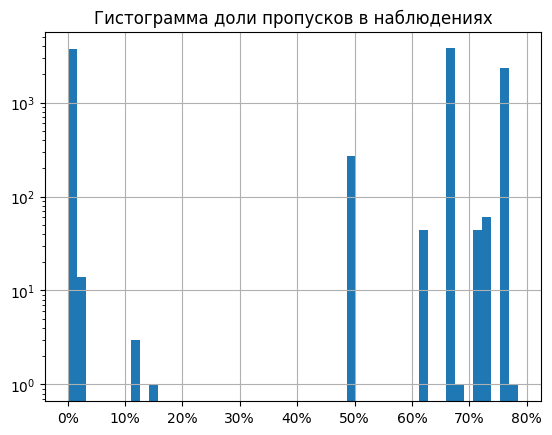

In [ ]:
ax = (df.isna().sum(axis=1) / df.shape[1]).hist(bins=50, log=True)
ax.xaxis.set_major_formatter('{x:.0%}')
plt.title('Гистограмма доли пропусков в наблюдениях');

Мы видим, что:
1. Большая доля наблюдений не имеет пропусков вообще
2. Небольшая доля наблюдений имеет приемлемую долю пропусков (до 15%)
3. Большая доля наблюдений имеет очень большую долю пропусков (50-80 %)

В таком случае, удаление наблюдений имеет смысл. Чтобы определиться с границей для удаления наблюдений, выведем таблицу 'количество пропусков' - 'частота':

In [ ]:
df.isna().sum(axis=1).value_counts().sort_index()

0     3688
1       14
5        3
6        1
21     270
26      44
28    3761
29       1
30      44
31      61
32    2354
33       1
dtype: int64

Итак, адекватной границей для удаления наблюдений является 21 пропуск. Так, у нас останутся чуть меньше 4 тысяч наблюдений, что тоже достаточно для кластеризации.

In [ ]:
df = df[~(df.isna().sum(axis=1) >= 21)]
df.head(-5)

,income_base_type,credit_purpose,insurance_flag,dti,sex,full_age_child_number,dependant_number,education,empl_type,empl_size,bankaccount_flag,period_at_work,age,empl_property,empl_form,family_status,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_accountactive180,num_accountactive90,num_accountactive60,active_to_all_prc,numaccountactiveall,numaccountclosed,sum_of_paym_months,all_credits,active_not_cc,own_closed,min_mnthafterloan,max_mnthafterloan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
5,2НДФЛ,Покупка недвижимости/ строительство,1,0.49,женский,1,0,высшее,менеджер среднего звена,< 50,0.00,91.00,31.00,Другое,ОАО,женат / замужем,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,72.00,97.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Поступление зарплаты на счет,Ремонт,1,0.26,мужской,0,0,высшее,специалист,>250,0.00,19.00,26.00,Другое,ООО,женат / замужем,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,2.00,10.00,2.00,0.00,0.00,12.00,35.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
12,Форма банка (без печати работодателя),Покупка недвижимости/ строительство,1,0.52,мужской,0,0,высшее,менеджер среднего звена,>250,0.00,121.00,57.00,Другое,Государственное предприятие,женат / замужем,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.25,1.00,3.00,71.00,4.00,1.00,0.00,22.00,93.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19,Поступление зарплаты на счет,Ремонт,0,0.21,мужской,0,0,незаконченное высшее,менеджер среднего звена,>250,3.00,55.00,26.00,Другое,ООО,женат / замужем,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.00,0.33,1.00,2.00,32.00,3.00,0.00,1.00,34.00,35.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
21,Поступление зарплаты на счет,Покупка недвижимости/ строительство,1,0.30,мужской,3,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>250,0.00,38.00,37.00,Информационные технологии,ООО,женат / замужем,9.00,9.00,7.00,5.00,4.00,0.18,1.00,2.00,0.00,0.00,0.46,6.00,7.00,309.00,13.00,3.00,3.00,5.00,97.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,Поступление зарплаты на счет,Ремонт,0,0.40,женский,0,0,высшее,менеджер среднего звена,>250,0.00,72.00,38.00,Торговля,ООО,женат / замужем,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,25.00,2.00,1.00,0.00,16.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10213,2НДФЛ,Ремонт,1,0.37,мужской,0,0,высшее,вспомогательный персонал,>250,1.00,17.00,52.00,Торговля,ООО,женат / замужем,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.25,1.00,3.00,62.00,4.00,0.00,1.00,3.00,59.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10214,Форма банка (без печати работодателя),Ремонт,1,0.53,мужской,1,0,Высшее/Второе высшее/Ученая степень,рабочий,>250,0.00,32.00,26.00,Торговля,ООО,женат / замужем,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,0.00,0.00,0.67,6.00,3.00,97.00,9.00,3.00,0.00,4.00,52.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10219,Форма банка (без печати работодателя),Ремонт,1,0.27,женский,0,0,высшее,менеджер высшего звена,>250,0.00,73.00,47.00,Торговля,ЗАО,гражданский брак,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.24,4.00,13.00,219.00,17.00,3.00,1.00,2.00,95.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
df.isna().sum()[df.isna().sum() > 0]

dti               1
family_status     1
max90days         4
max60days         4
max30days         4
max21days         4
max14days         4
avg_num_delay    13
dtype: int64

dti - номинальная переменная, заполним пропуск медианой

In [ ]:
df['dti'] = df['dti'].fillna(df['dti'].median())

family_status - категориальная переменная, заполним пропуск модой

In [ ]:
df['family_status'] = df['family_status'].fillna(df['family_status'].mode()[0])

Оставшиеся переменные - `max90days`, `max60days`, `max30days`, `max21days`, `max14days`, `avg_num_delay` - номинальные, заполним пропуски медианой.

In [ ]:
for col in ['max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay']:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
#кол-во пропусков по столбцам
df.isna().sum()

income_base_type         0
credit_purpose           0
insurance_flag           0
dti                      0
sex                      0
full_age_child_number    0
dependant_number         0
education                0
empl_type                0
empl_size                0
bankaccount_flag         0
period_at_work           0
age                      0
empl_property            0
empl_form                0
family_status            0
max90days                0
max60days                0
max30days                0
max21days                0
max14days                0
avg_num_delay            0
if_zalog                 0
num_accountactive180     0
num_accountactive90      0
num_accountactive60      0
active_to_all_prc        0
numaccountactiveall      0
numaccountclosed         0
sum_of_paym_months       0
all_credits              0
active_not_cc            0
own_closed               0
min_mnthafterloan        0
max_mnthafterloan        0
dlq_exist                0
thirty_in_a_year         0
s

Итак, все пропуски заполнены. Перейдем к исправлению некорректных значений

### Исправление некорректных значений


Здесь мы:
1. Пройдемся по всем категориальным переменным, убедимся, что категории адекватные и что категории с слишком малой частотой отсутствуют
2. Пройдемся по номинальным переменным, убедимся, что распределение корректное и неадекватные значения отсутствуют

На данном этапе я разделяю переменные на категориальные и номинальные так, как это сделал pandas. При составлении итоговой витрины данных я отдельно отмечу переменные, которые реально являются категориальными или номинальными.

#### Категориальные переменные

In [ ]:
df['income_base_type'].value_counts()

Поступление зарплаты на счет              1341
Форма банка (без печати работодателя)     1032
2НДФЛ                                      945
Свободная форма с печатью работодателя     388
Name: income_base_type, dtype: int64

Все отлично, переименуем категории, чтобы сделать их короче

In [ ]:
df['income_base_type'] = df['income_base_type'].replace({'Поступление зарплаты на счет' : 'зарплата',
                                                         'Форма банка (без печати работодателя)' : 'форма без печати',
                                                         'Свободная форма с печатью работодателя' : 'форма с печатью'})
df['income_base_type'].value_counts()

зарплата            1341
форма без печати    1032
2НДФЛ                945
форма с печатью      388
Name: income_base_type, dtype: int64

In [ ]:
df['credit_purpose'].value_counts()

Ремонт                                 2150
Покупка автомобиля                      569
Покупка недвижимости/ строительство     477
Другое                                  127
Отпуск                                  125
Покупка мебели                           71
Лечение                                  50
Покупка бытовой техники                  49
Обучение                                 45
Покупка земли                            43
Name: credit_purpose, dtype: int64

Здесь есть категории с малой частотой, но заменить их на что-нибудь не получится, так как нет похожих по смыслу категорий.

In [ ]:
df['sex'].value_counts()

женский    1865
мужской    1841
Name: sex, dtype: int64

In [ ]:
df['education'].value_counts()

высшее                                 2081
Высшее/Второе высшее/Ученая степень     616
среднее-специальное                     592
среднее                                 166
второе высшее                           116
незаконченное высшее                    112
*n.a.*                                   17
ученая степень                            5
Неполное среднее                          1
Name: education, dtype: int64

* `*n.a.*` переведем в моду, то есть `высшее`
* `ученая степень` переведем в `Высшее/Второе высшее/Ученая степень` из-за схожести категорий по смыслу
* Только 1 наблюдение имеет категорию `Неполное среднее`. Так как вводить отдельную переменную для 1 наблюдения некорректно, мы переведем `Неполное среднее` в ближайшую по смыслу категорию - `среднее`.

In [ ]:
df['education'] = df['education'].replace({'*n.a.*' : 'высшее',
                                           'ученая степень' : 'Высшее/Второе высшее/Ученая степень',
                                           'Неполное среднее' : 'среднее'})
df['education'].value_counts()

высшее                                 2098
Высшее/Второе высшее/Ученая степень     621
среднее-специальное                     592
среднее                                 167
второе высшее                           116
незаконченное высшее                    112
Name: education, dtype: int64

In [ ]:
df['empl_type'].value_counts()

специалист                  1323
менеджер среднего звена      888
вспомогательный персонал     639
рабочий                      346
менеджер высшего звена       299
менеджер по продажам         110
торговый представитель        95
другое                         4
страховой агент                2
Name: empl_type, dtype: int64

* `торговый представитель` переведем в `менеджер по продажам` из-за схожести по смыслу
* `другое` и `страховой агент` имеют слишком мало значений, чтобы иметь отдельные переменные, переведем их в моду, то есть `специалист`

In [ ]:
df['empl_type'] = df['empl_type'].replace({'торговый представитель' : 'менеджер по продажам',
                                           'другое' : 'специалист',
                                           'страховой агент' : 'специалист'})
df['empl_type'].value_counts()

специалист                  1329
менеджер среднего звена      888
вспомогательный персонал     639
рабочий                      346
менеджер высшего звена       299
менеджер по продажам         205
Name: empl_type, dtype: int64

In [ ]:
df['empl_size'].value_counts()

>250      2808
< 50       897
*n.a.*       1
Name: empl_size, dtype: int64

`*n.a.*` переведем в моду, `>250`

In [ ]:
df['empl_size'] = df['empl_size'].replace({'*n.a.*' : '>250'})
df['empl_size'].value_counts()

>250    2809
< 50     897
Name: empl_size, dtype: int64

In [ ]:
df['empl_property'].value_counts()

Торговля                       2105
Другое                         1183
Информационные технологии       345
Юридические услуги               43
Сельское и лесное хозяйство      30
Name: empl_property, dtype: int64

У `Юридические услуги` и `Сельское и лесное хозяйство` слишком мало значений, чтобы иметь отдельные переменные, переведем их в `Другое` из-за схожести по смыслу

In [ ]:
df['empl_form'].value_counts()

ООО                               2519
ЗАО                                512
ОАО                                367
Индивидуальный предприниматель     112
Государственное предприятие        108
Иная форма                          88
Name: empl_form, dtype: int64

Все в порядке, переименуем некоторые категория для удобства.

In [ ]:
df['empl_form'] = df['empl_form'].replace({'Индивидуальный предприниматель' : 'ИП', 'Иная форма' : 'Другое'})
df['empl_form'].value_counts()

ООО                            2519
ЗАО                             512
ОАО                             367
ИП                              112
Государственное предприятие     108
Другое                           88
Name: empl_form, dtype: int64

In [ ]:
df['family_status'].value_counts()

женат / замужем         2024
холост / не замужем     1189
разведен / разведена     223
гражданский брак         161
повторный брак           106
вдовец / вдова             3
Name: family_status, dtype: int64

`вдовец / вдова` имеет слишком малую частоту, переведем их в `холост / не замужем` из-за схожести по смыслу.  
Переименуем все категории, чтобы они были короче.

In [ ]:
df['family_status'] = df['family_status'].replace({'женат / замужем' : 'брак',
                                                   'холост / не замужем' : 'не в браке',
                                                   'разведен / разведена' : 'развод',
                                                   'гражданский брак' : 'гр.брак',
                                                   'повторный брак' : '2ой брак',
                                                   'вдовец / вдова' : 'не в браке'})
df['family_status'].value_counts()

брак          2024
не в браке    1192
развод         223
гр.брак        161
2ой брак       106
Name: family_status, dtype: int64

#### Номинальные переменные

In [ ]:
df['insurance_flag'].value_counts()

1    2239
0    1467
Name: insurance_flag, dtype: int64

<Axes: >

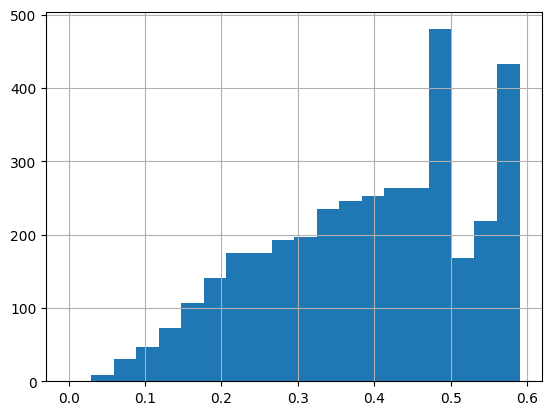

In [ ]:
df['dti'].hist(bins=20)

<Axes: >

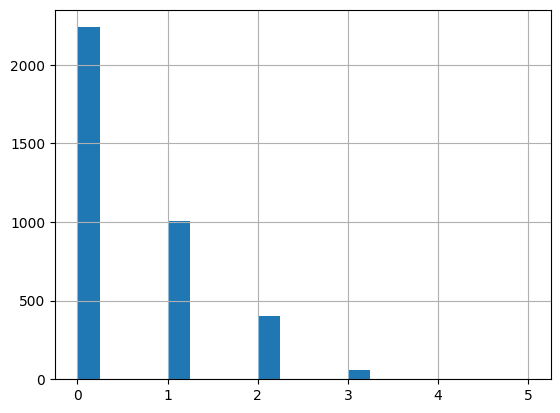

In [ ]:
df['full_age_child_number'].hist(bins=20)

In [ ]:
df['dependant_number'].value_counts()

0    3695
1      10
2       1
Name: dependant_number, dtype: int64

In [ ]:
df['bankaccount_flag'].value_counts()

0.00    3046
1.00     439
3.00     221
Name: bankaccount_flag, dtype: int64

Так как значения 2 и больше не различаются между собой (из описания данных), мы переведем 3 в 2.

In [ ]:
df['bankaccount_flag'] = df['bankaccount_flag'].replace({3 : 2})
df['bankaccount_flag'].value_counts()

0.00    3046
1.00     439
2.00     221
Name: bankaccount_flag, dtype: int64

<Axes: >

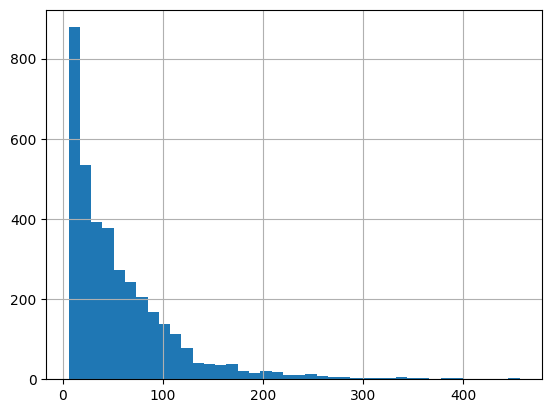

In [ ]:
df['period_at_work'].hist(bins=40)

Можно было бы сказать, что, например, значения большее 300 являются выбросами, однако они не настолько сильно отличаются от других значений, чтобы считать их ошибками ввода или обработки данных, поэтому мы их оставим.

Нижу я строю гистограммы по всем оставшимся переменным.

In [ ]:
for col in df.select_dtypes(include='number').columns[7:]:
  df[col].hist(bins=40)
  plt.title(f'Гистограмма переменной {col}')
  plt.show()

Были замечены выбросы с правой стороны распределения у многих переменных. Так, для каждой переменной с выбросами мы определили числовой порог (в словаре внизу). Если значение переменной больше этого порога, то оно считается выбросом и заменяется на медиану.

<Axes: >

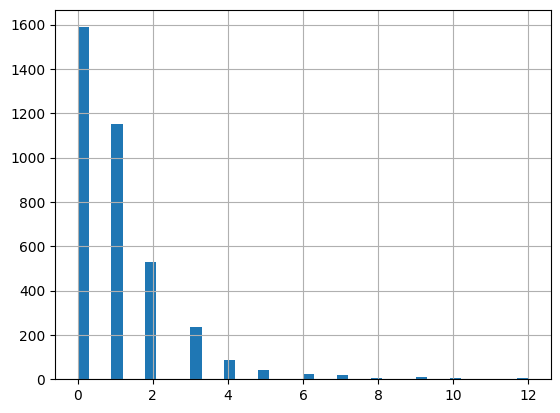

In [ ]:
threshold_dict = {'max90days' : 15, 'max60days' : 13, 'max30days' : 10, 'max21days' : 8, 'max14days' : 7, 'avg_num_delay' : .65,
 'num_accountactive180' : 4, 'sum_of_paym_months' : 450, 'all_credits' : 30,
 'own_closed' : 6, 'min_mnthafterloan' : 110, 'max_mnthafterloan' : 150}

for col, threshold in threshold_dict.items():
  df[col] = np.where(df[col] >= threshold, df[col].median(), df[col])

#проверка правильности работы на одной из переменных
df['max60days'].hist(bins=40)

Также я использую `describe` чтобы найти аномальные значения.

In [ ]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
insurance_flag,"3,706.00",0.60,0.49,0.00,0.00,1.00,1.00,1.00
dti,"3,706.00",0.39,0.14,0.00,0.29,0.41,0.49,0.59
full_age_child_number,"3,706.00",0.54,0.75,0.00,0.00,0.00,1.00,5.00
dependant_number,"3,706.00",0.00,0.06,0.00,0.00,0.00,0.00,2.00
bankaccount_flag,"3,706.00",0.24,0.55,0.00,0.00,0.00,0.00,2.00
period_at_work,"3,706.00",57.15,55.07,6.00,18.00,41.00,78.00,456.00
age,"3,706.00",35.79,8.26,23.00,29.00,34.00,41.75,62.00
max90days,"3,706.00",1.57,1.81,0.00,0.00,1.00,2.00,14.00
max60days,"3,706.00",1.08,1.45,0.00,0.00,1.00,2.00,12.00
max30days,"3,706.00",0.77,1.15,0.00,0.00,0.00,1.00,9.00


В переменной `min_mnthafterloan` есть значения -1, что нелогично, заменим их на 0.

In [ ]:
df['min_mnthafterloan'] = np.where(df['min_mnthafterloan'] < 0, 0, df['min_mnthafterloan'])

### Финальная витрина данных

In [ ]:
df.head(-5)

,income_base_type,credit_purpose,insurance_flag,dti,sex,full_age_child_number,dependant_number,education,empl_type,empl_size,bankaccount_flag,period_at_work,age,empl_property,empl_form,family_status,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_accountactive180,num_accountactive90,num_accountactive60,active_to_all_prc,numaccountactiveall,numaccountclosed,sum_of_paym_months,all_credits,active_not_cc,own_closed,min_mnthafterloan,max_mnthafterloan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
5,2НДФЛ,Покупка недвижимости/ строительство,1,0.49,женский,1,0,высшее,менеджер среднего звена,< 50,0.00,91.00,31.00,Другое,ОАО,брак,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,72.00,97.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,зарплата,Ремонт,1,0.26,мужской,0,0,высшее,специалист,>250,0.00,19.00,26.00,Другое,ООО,брак,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,2.00,10.00,2.00,0.00,0.00,12.00,35.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
12,форма без печати,Покупка недвижимости/ строительство,1,0.52,мужской,0,0,высшее,менеджер среднего звена,>250,0.00,121.00,57.00,Другое,Государственное предприятие,брак,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.25,1.00,3.00,71.00,4.00,1.00,0.00,22.00,93.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19,зарплата,Ремонт,0,0.21,мужской,0,0,незаконченное высшее,менеджер среднего звена,>250,2.00,55.00,26.00,Другое,ООО,брак,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.00,0.33,1.00,2.00,32.00,3.00,0.00,1.00,34.00,35.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
21,зарплата,Покупка недвижимости/ строительство,1,0.30,мужской,3,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>250,0.00,38.00,37.00,Информационные технологии,ООО,брак,9.00,9.00,7.00,5.00,4.00,0.18,1.00,2.00,0.00,0.00,0.46,6.00,7.00,309.00,13.00,3.00,3.00,5.00,97.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,зарплата,Ремонт,0,0.40,женский,0,0,высшее,менеджер среднего звена,>250,0.00,72.00,38.00,Торговля,ООО,брак,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,25.00,2.00,1.00,0.00,16.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10213,2НДФЛ,Ремонт,1,0.37,мужской,0,0,высшее,вспомогательный персонал,>250,1.00,17.00,52.00,Торговля,ООО,брак,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.25,1.00,3.00,62.00,4.00,0.00,1.00,3.00,59.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10214,форма без печати,Ремонт,1,0.53,мужской,1,0,Высшее/Второе высшее/Ученая степень,рабочий,>250,0.00,32.00,26.00,Торговля,ООО,брак,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,0.00,0.00,0.67,6.00,3.00,97.00,9.00,3.00,0.00,4.00,52.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10219,форма без печати,Ремонт,1,0.27,женский,0,0,высшее,менеджер высшего звена,>250,0.00,73.00,47.00,Торговля,ЗАО,гр.брак,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.24,4.00,13.00,219.00,17.00,3.00,1.00,2.00,95.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Виды переменных, представленных в датасете:
* Категориальные - представлены в витрине данных в формате `object`. Далее эти переменные будут закодированы с помощью One Hot Encoding'а.
* Квази-числовые - переменные, представленные в формате `int`, которые на самом деле являются категориальными переменными. В них входят переменные `age` и `bankaccount_flag`. Эти переменные будут закодированы с помощью One Hot Encoding'а, как и категориальные.
* Дамми-переменные - переменные, принимающие значения 0 или 1.
* Числовые - переменные формата `int` или `float`, которые отражают непрерывные или дискретные данные.

Список переменных по типам представлен внизу.

In [ ]:
cat_cols = ['income_base_type',
 'credit_purpose',
 'sex',
 'education',
 'empl_type',
 'empl_size',
 'empl_property',
 'empl_form',
 'family_status']

qnum_cols = ['age', 'bankaccount_flag']

dummy_cols = ['insurance_flag',
 'if_zalog',
 'dlq_exist',
 'thirty_in_a_year',
 'sixty_in_a_year',
 'ninety_in_a_year',
 'thirty_vintage',
 'sixty_vintage',
 'ninety_vintage']

num_cols = ['dti',
 'full_age_child_number',
 'dependant_number',
 'period_at_work',
 'max90days',
 'max60days',
 'max30days',
 'max21days',
 'max14days',
 'avg_num_delay',
 'num_accountactive180',
 'num_accountactive90',
 'num_accountactive60',
 'active_to_all_prc',
 'numaccountactiveall',
 'numaccountclosed',
 'sum_of_paym_months',
 'all_credits',
 'active_not_cc',
 'own_closed',
 'min_mnthafterloan',
 'max_mnthafterloan']

Примечание:
* Категориальные переменные можно получить с помощью:

```
df.select_dtypes('object').columns.to_list()
```
* Квази-числовые переменные можно получить только ручным отбором
* Дамми-переменные можно отобрать с помощью:

```
dummy_list = []
for col in df.columns:
  if len(df[col].unique()) == 2 and not pd.api.types.is_object_dtype(df[col]):
    dummy_list.append(col)
dummy_list
```
* Отобрать осташиеся переменные, а также проверить правильность отбора (нет ли повторяющихся переменных) можно с помощью:

```
df_copy = df.copy(deep=True)
df_copy = df_copy.drop(cat_cols + qnum_cols + dummy_cols, axis=1)
df_copy.columns.to_list()
```

In [ ]:
df['age'] = pd.qcut(df['age'], 5)

Количество категорий в каждой категориальной переменной:

In [ ]:
for col in cat_cols + qnum_cols:
  print(f'* {col}: {len(df[col].unique())} значений')

* income_base_type: 4 значений
* credit_purpose: 10 значений
* sex: 2 значений
* education: 6 значений
* empl_type: 6 значений
* empl_size: 2 значений
* empl_property: 5 значений
* empl_form: 6 значений
* family_status: 5 значений
* age: 5 значений
* bankaccount_flag: 3 значений


Наконец, я закодирую необходимые переменные.

In [ ]:
df = pd.get_dummies(df, columns=cat_cols + qnum_cols, dtype='int')

Итоговая витрина данных. В зависимости от применяемого метода сегментации, данные могут быть дополнительно нормализованы.

In [ ]:
df.head(-5)

,insurance_flag,dti,full_age_child_number,dependant_number,period_at_work,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_accountactive180,num_accountactive90,num_accountactive60,active_to_all_prc,numaccountactiveall,numaccountclosed,sum_of_paym_months,all_credits,active_not_cc,own_closed,min_mnthafterloan,max_mnthafterloan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,income_base_type_2НДФЛ,income_base_type_зарплата,income_base_type_форма без печати,income_base_type_форма с печатью,credit_purpose_Другое,credit_purpose_Лечение,credit_purpose_Обучение,credit_purpose_Отпуск,credit_purpose_Покупка автомобиля,credit_purpose_Покупка бытовой техники,credit_purpose_Покупка земли,credit_purpose_Покупка мебели,credit_purpose_Покупка недвижимости/ строительство,credit_purpose_Ремонт,sex_женский,sex_мужской,education_Высшее/Второе высшее/Ученая степень,education_второе высшее,education_высшее,education_незаконченное высшее,education_среднее,education_среднее-специальное,empl_type_вспомогательный персонал,empl_type_менеджер высшего звена,empl_type_менеджер по продажам,empl_type_менеджер среднего звена,empl_type_рабочий,empl_type_специалист,empl_size_< 50,empl_size_>250,empl_property_Другое,empl_property_Информационные технологии,empl_property_Сельское и лесное хозяйство,empl_property_Торговля,empl_property_Юридические услуги,empl_form_Государственное предприятие,empl_form_Другое,empl_form_ЗАО,empl_form_ИП,empl_form_ОАО,empl_form_ООО,family_status_2ой брак,family_status_брак,family_status_гр.брак,family_status_не в браке,family_status_развод,"age_(22.999, 28.0]","age_(28.0, 32.0]","age_(32.0, 37.0]","age_(37.0, 43.0]","age_(43.0, 62.0]",bankaccount_flag_0.0,bankaccount_flag_1.0,bankaccount_flag_2.0
5,1,0.49,1,0,91.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,72.00,97.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
7,1,0.26,0,0,19.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,2.00,10.00,2.00,0.00,0.00,12.00,35.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
12,1,0.52,0,0,121.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.25,1.00,3.00,71.00,4.00,1.00,0.00,22.00,93.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
19,0,0.21,0,0,55.00,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.00,0.33,1.00,2.00,32.00,3.00,0.00,1.00,34.00,35.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
21,1,0.30,3,0,38.00,9.00,9.00,7.00,5.00,4.00,0.18,1.00,2.00,0.00,0.00,0.46,6.00,7.00,309.00,13.00,3.00,3.00,5.00,97.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,0,0.40,0,0,72.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,25.00,2.00,1.00,0.00,16.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
10213,1,0.37,0,0,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.25,1.00,3.00,62.00,4.00,0.00,1.00,3.00,59.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
10214,1,0.53,1,0,32.00,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3706 entries, 5 to 10240
Data columns (total 85 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   insurance_flag                                      3706 non-null   int64  
 1   dti                                                 3706 non-null   float64
 2   full_age_child_number                               3706 non-null   int64  
 3   dependant_number                                    3706 non-null   int64  
 4   period_at_work                                      3706 non-null   float64
 5   max90days                                           3706 non-null   float64
 6   max60days                                           3706 non-null   float64
 7   max30days                                           3706 non-null   float64
 8   max21days                                           3706 non-null   float64
 

# Часть 2. Сегментация


В рамках сегментации будет выполнена кластеризация KMeans и RFM-анализ.

**KMeans**

Преимущества:
* на практике очень часто этот метод дает наилучшие результаты, по сравнению с другими методами кластеризации
* простая имплементация
* кластеризует все наблюдения, в отличие, например, от DBSCAN, который не классифицирует слишком шумные точки. Вообще, это хорошая идея - не кластеризовать слишком шумные точки (выбросы), - однако, наша задача подразумевает присвоение группы каждому клиенту.

Недостатки:
* параметрический, необходима дополнительная работа с данными для выявления оптимального числа кластеров.
* случайная инициализация центроидов. При нескольких прогонах алгоритма результат получится разных (если не закрепить `seed`)
* необходима стандартизация данных перед использованием

\
\
**RFM-анализ**

Преимущества:
* очень простая имплементация
* очень интуитивный механизм и принцип сегментации
* хорошо подходит для прикладных бизнес-задач

Недостатки:
* малый контроль за количеством получаемых кластеров
* принимает во внимание только RFM-параметры для сегментации


## KMeans кластеризация

Стандартная нормировка

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

arr = scaler.fit_transform(df)
df_std = pd.DataFrame(arr, columns=df.columns)

### Выбор количества кластеров

#### Метод локтя

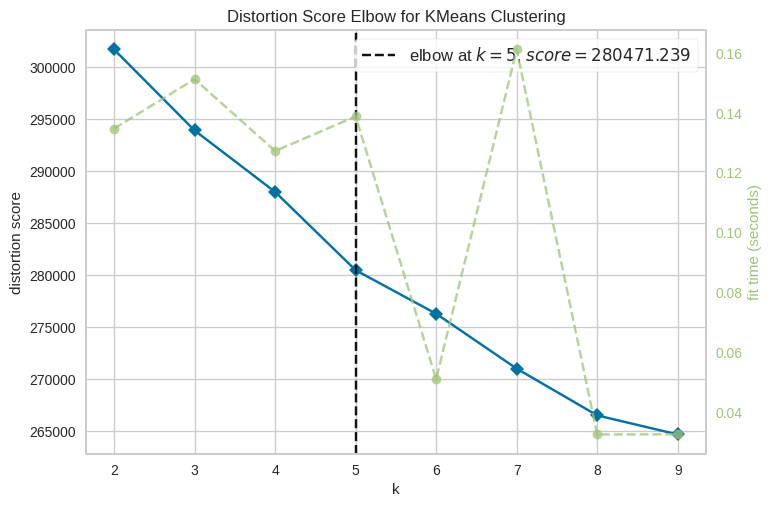

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=888, n_init='auto')
visualizer = KElbowVisualizer(model, k = (2,10))

visualizer.fit(df_std)
visualizer.show()
plt.show()

Оптимальное количество кластеров - 5.

#### Иерархическая дендрограмма

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

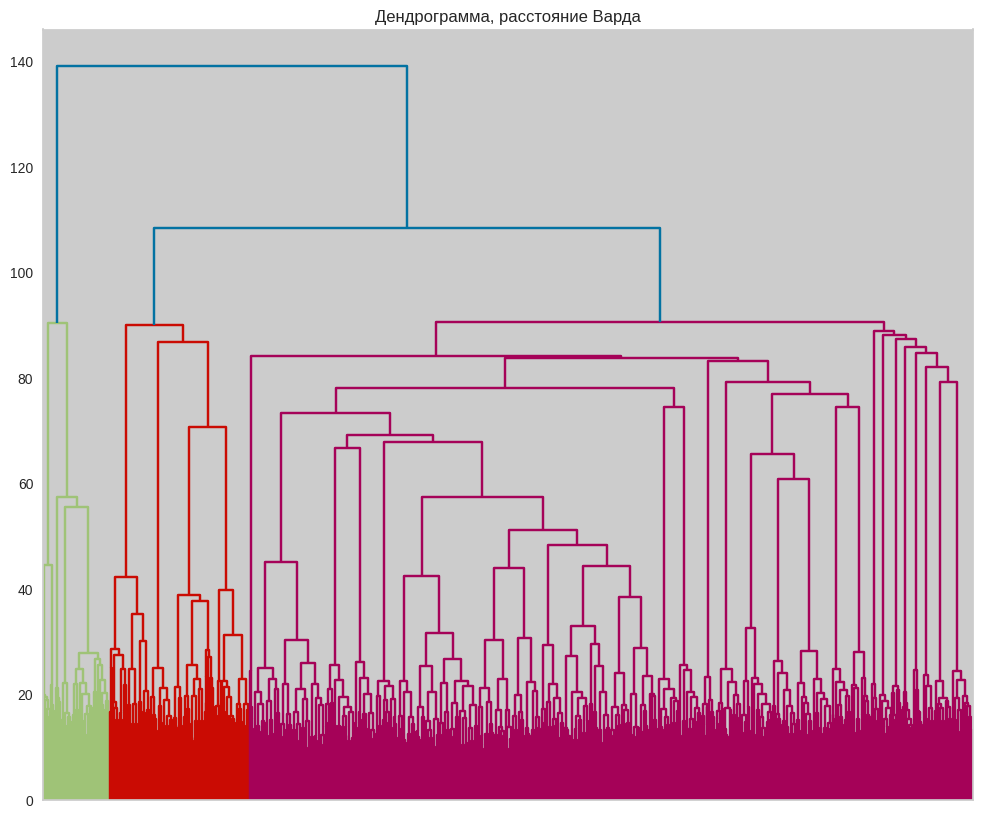

In [ ]:
fig = plt.figure(figsize=(12, 10))

ax = dendrogram(linkage(df_std, 'ward'))

plt.title('Дендрограмма, расстояние Варда')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False);

Оптимальное количество кластеров - 2 или 3.

#### Метод силуэта

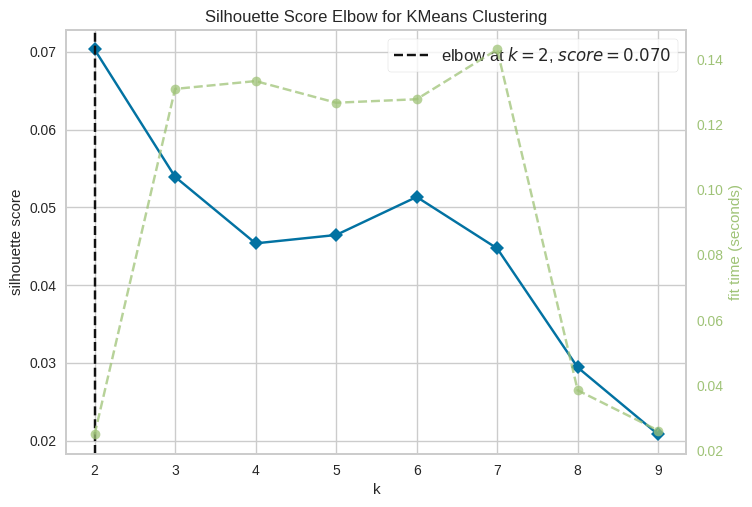

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=888, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(df_std)
visualizer.show();

Оптимальное количество кластеров - 2.

Три использованных метода выбора оптимального количества кластеров дали нам разные оценки:
* Метод локтя - 5
* Иерархическая дендрограмма - 2 или 3
* Метод силуэта - 2

Можно было бы сказать, что 2 - это оптимальное количество кластеров. Однако, это довольно мало, чтобы описать клиентскую базу.

Обратим внимание, что:
* Метод локтя показывает, что функция метрики 'distortion' по количеству кластеров довольно пологая. Это значит, что мы можем выбрать любое адекватное значение в качестве локтя, а этой метрике можно дать более низкий приоритет по сравнению с другими методами.
* В методе силуэта соотвествующий коэффициент на k=3 не сильно отличается от максимума.

Принимая во внимание бизнес-логику и детальный анализ результатов, я выбираю 3 в качестве оптимального количества кластеров.

### Проведение кластеризации

График ниже вставлен просто для проверки того, что получившиеся кластеры обладают какими-то уникальными характеристиками.

<Figure size 1600x800 with 0 Axes>

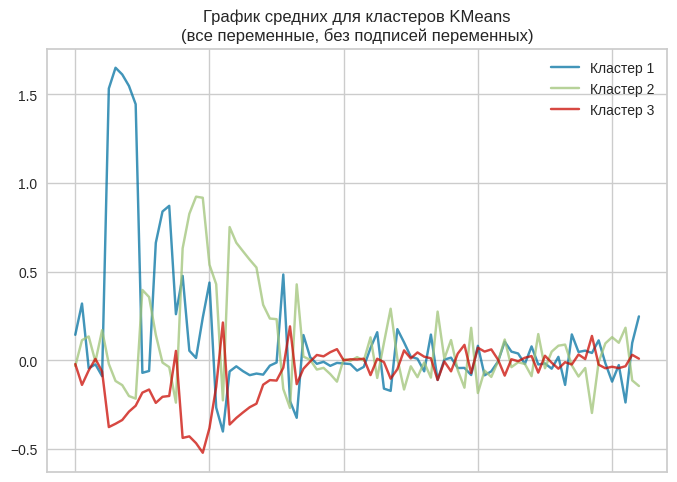

In [ ]:
clusterer = KMeans(n_clusters=3, init='k-means++', random_state=8881, n_init='auto')
clusterer.fit(df_std)

out = pd.DataFrame(clusterer.cluster_centers_, columns=df_std.columns)
out.index = [f'Кластер {i + 1}' for i in out.index]

fig = plt.figure(figsize=(16, 8))
ax = out.T.plot(alpha=.75)
plt.title('График средних для кластеров KMeans\n(все переменные, без подписей переменных)')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False);

Как мы видим, уникальные характеристики действительно есть.  

Отберем переменные, где центроиды кластеров больше отличаются друг от друга, и визулизируем эти центроиды для описания кластеров.

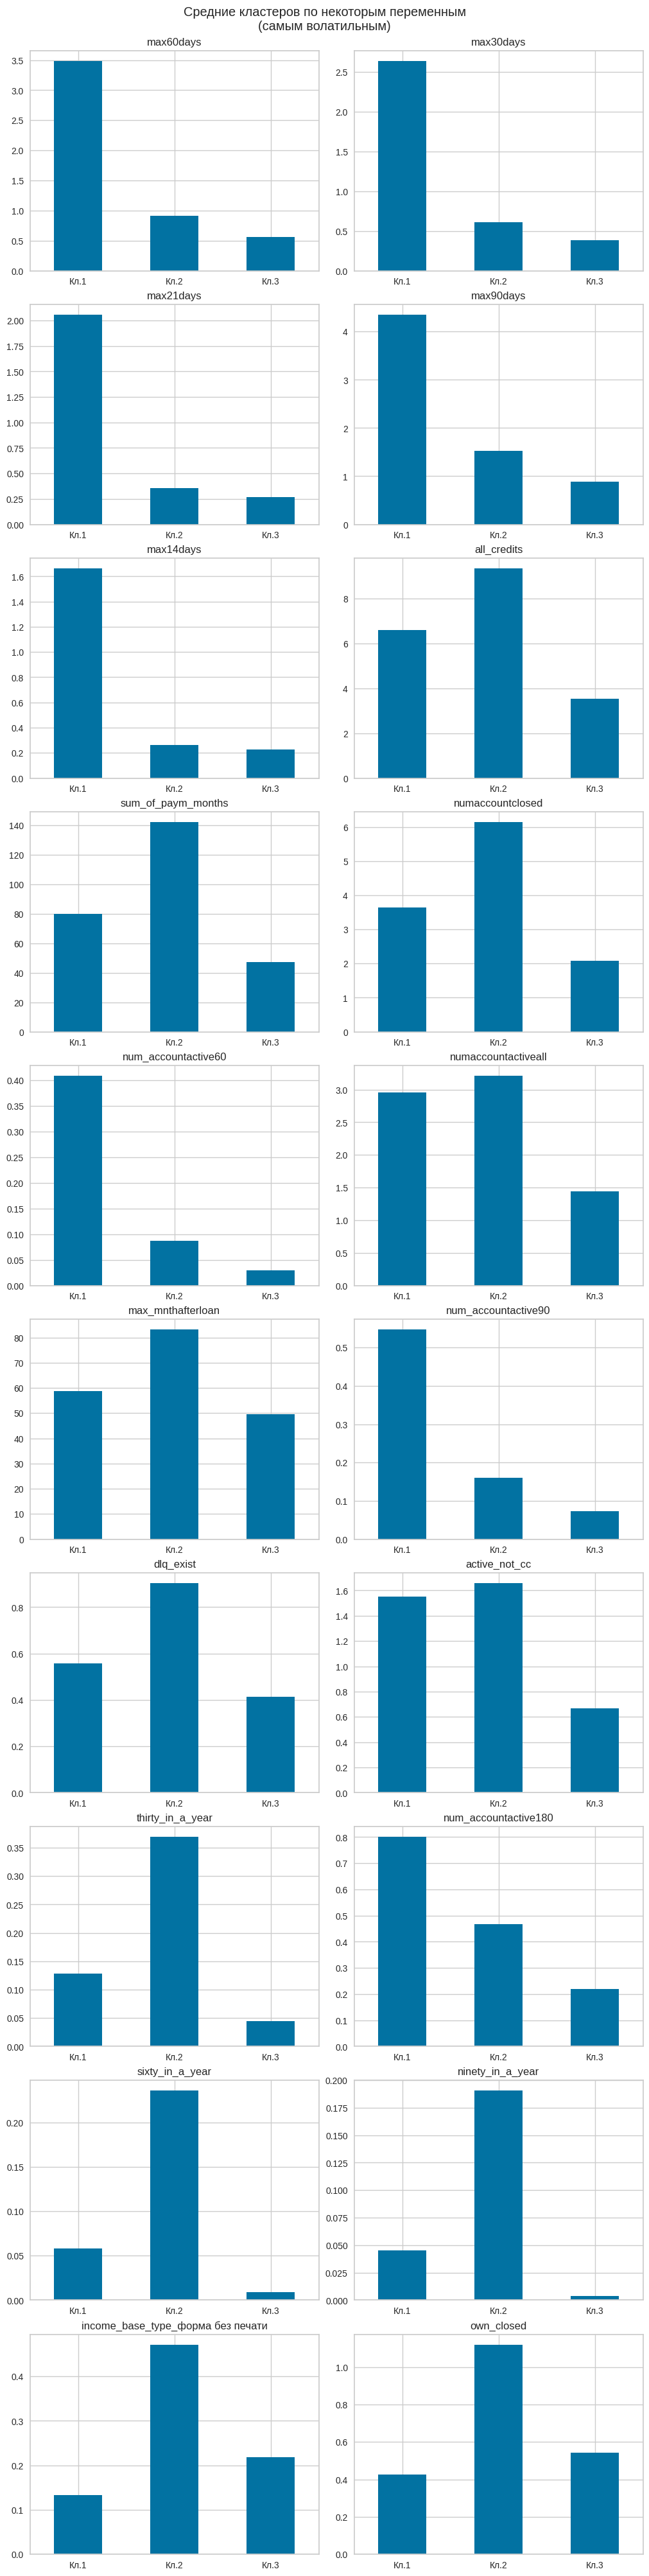

In [ ]:
out_scaled = pd.DataFrame(scaler.inverse_transform(out), columns=out.columns)
out_scaled.index = [f'Кл.{i+1}' for i in range(out_scaled.shape[0])]

features_to_display = 20
out_display = out_scaled[out.std().sort_values(ascending=False)[:features_to_display].index]

fig, axs = plt.subplots(features_to_display // 2, 2, figsize=(2*5, features_to_display*2), layout='constrained')

for i, col in enumerate(out_display.columns):
  ax = axs[i // 2, i % 2]
  out_display[col].plot(kind='bar', ax=ax)
  ax.tick_params(axis='x', labelrotation=0)
  ax.set_title(col)


plt.suptitle('Средние кластеров по некоторым переменным\n(самым волатильным)');

Описать кластеры можно также с помощью самой таблицы, которая имеет больше данных, но ориентироваться в ней сложнее.

In [ ]:
out_scaled.T

,Кл.1,Кл.2,Кл.3
insurance_flag,0.67,0.59,0.59
dti,0.44,0.41,0.38
full_age_child_number,0.50,0.64,0.49
dependant_number,0.00,0.00,0.00
period_at_work,52.25,66.55,53.67
max90days,4.35,1.53,0.89
max60days,3.48,0.92,0.57
max30days,2.63,0.61,0.38
max21days,2.05,0.35,0.27
max14days,1.66,0.26,0.23


### Описание кластеров

**Кластер 1**  
Особенности:
* часто обращаются в бюро кредитных историй - в среднем 2,6 раз за месяц
* большое количество открытых счетов - 80% клиентов имели открытый счет за последние полгода
* недавно брали кредит - в среднем, 8 месяцев назад
* чаще всего подтверждают доход справкой 2-НДФЛ
* реже всех подтверждают доход формой без печати работодателя
* чаще имеют банковский аккаунт

Описание:
* берут кредит на ремонт
* чаще женщина
* высшее образование
* работает чаще всего специалистом или менеджером среднего звена
* работает в крупной компании
* компания, где клиент работает, занимается торговлей
* организационно-правовая форма компании - ООО
* чаще в браке или холост/не замужем
* возраст - чаще до 32 лет
* не имеет банковского аккаунта

\
\
**Кластер 2**  
Особенности:
* дольше находятся на текущем месте работы - в среднем 66 дней
* чаще задерживают оплату - в среднем 2,5 часа
* чаще имеют залог - половина клиентов в кластере
* большее количество аккаунтов - как открытых, так и закрытых
* больше всех платят - в среднем 141 тысячу рублей за месяц
* больше всех кредитов - в среднем 9
* большее количество закрытых кредитов
* раньше всех брали свой 1ый кредит в банке - в среднем, 7 лет назад
* чаще всех имели просрочку когда-либо - 90% клиентов в кластере
* чаще имеют просрочку - за прошлый год 20% клиентов в кластере имеют просрочку >90 дней, 37% имеют просрочку >30 дней
* чаще работают в маленькой организации - 32% клиентов работают в компании <50 человек

Описание:
* чаще подтверждают доход формой банка без печати работодателя
* чаще всего берут кредит на ремонт или покупку автомобиля
* имеют высшее или второе высшее/ученую степень
* работает чаще всего специалистом или менеджером среднего звена
* работает в крупной компании
* компания, где клиент работает, занимается торговлей
* организационно-правовая форма компании - ООО
* чаще в браке или холост/не замужем
* возраст - чаще от 32 лет
* не имеет банковского аккаунта

\
\
**Кластер 3**  
Особенности:
* самый низкий показатель debt-to-income - в среднем 0.38
* делают меньше всех запросов в бюро кредитных историй - в среднем 89 за 3 месяца
* реже всех имеют залог (25%)
* меньше всех активных аккаунтов - в среднем 0.22 за последние полгода
* меньше всех закрытых аккаунтов - в среднем 2 на клиента
* меньше всех платят по кредитам - в среднем 47 тысяч рублей за месяц
* реже имеют просрочки (41%)

Описание:
* подтверждение дохода - поступление зарплаты на счет
* цель кредита - ремон или покупка автомобиля
* высшее образование
* специалист
* работает в крупной компании (>250)
* компания занимается торговлей
* организационно-правовая форма компании - ООО
* чаще в браке или холост/не замужем
* возраст - чаще до 28 лет
* не имеет банковского аккаунта

\
\
**Выводы**  
Все кластеры обладают какими-то особенностями, что говорит о правильном подборе количества кластеров. Описание кластеров получилось практически идентичным, что довольно грустно, однако это больше говорит о специфике данных. Так, мы вывели 3 специфичных модели поведения клиентов. Отсутствие какой-либо существенной связи между поведением клиента и его физическими и социальными характеристиками говорит о том, что его финансовое поведение больше зависит от внутренних, психологических особенностях клиента.

## RFM сегментация

RFM-сегментация подразумевает разбиение клиентской базы на сегменты согласно показателям:
* R (Recency) - как давно клиент сделал последнюю покупку
* F (Frequency) - как часто клиент совершает покупки
* M (Monetary) - обьем сделанных покупок в деньгах

\
**Большие сегменты по одной переменной**  
По каждому показателю клиенты разбиваются на 3 сегмента с равной частотой (то есть по трети клиентов в каждом кластере). Эти большие сегменты называются числами от 1 - самый крутой с точки зрения бизнеса клиент, то есть очень недавно совершал покупку, очень часто, или на большую сумму, - до 3. Названию большого сегмента также предшествует буква показателя, например, R1, F3 и так далее.\
\
**Финальные сегменты по всем переменным**  
Далее, мы собираем эти сегменты: например, клиенту в сегментах R1, F3, M2 присуждают кластер 132. Так, мы получаем 3^3=27 кластеров. Обычно анализируют не все 27 кластеров, так как это слишком много, а выделяют от 4 до 7 самых важных с точки зрения увеличения вовлеченности клиентов и роста выручки.\
\
RFM показатели в нашем датасете:
* R (Recency) - `min_MnthAfterLoan` - кол-во месяцев, прошедшее с момента выдачи прошлого кредита
* F (Frequency) - `all_credits` - кол-во кредитов
* M (Monetary) - `sum_of_paym_months` - сумма платежей за последний месяц в тысячах рублей


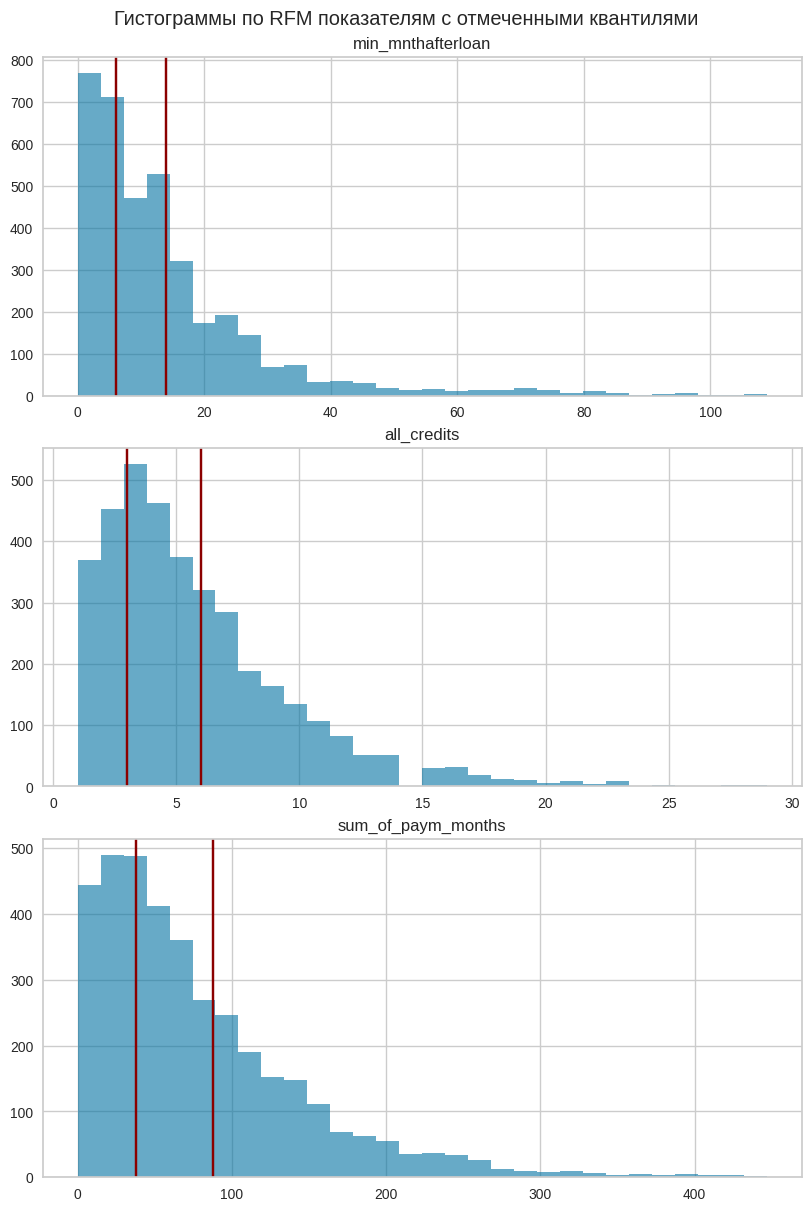

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(8, 3*4), layout='constrained')

rfms = ['min_mnthafterloan', 'all_credits', 'sum_of_paym_months']

for i, col in enumerate(rfms):
  ax = axs[i]
  df[col].hist(bins=30, alpha=.6, ax=ax)
  ax.axvline(df[col].quantile(.33), color='darkred')
  ax.axvline(df[col].quantile(.66), color='darkred')
  ax.set_title(col)

plt.suptitle('Гистограммы по RFM показателям c отмеченными квантилями');

In [ ]:
#границы RFM переменных для определения изначальных сегментов
df[rfms].quantile([.33, .66]).T

,0.33,0.66
min_mnthafterloan,6.00,14.00
all_credits,3.00,6.00
sum_of_paym_months,38.00,88.00


In [ ]:
df['R'] = pd.qcut(df['min_mnthafterloan'], 3, labels=[1,2,3]) #с Recency чем значение меньше, тем лучше, с остальными - наоборот
df['F'] = pd.qcut(df['all_credits'], 3, labels=[3,2,1])
df['M'] = pd.qcut(df['sum_of_paym_months'], 3, labels=[3,2,1])

df['RFM'] = (df['R'].astype('str') + df['F'].astype('str') + df['M'].astype('str')).astype('category')
df['RFM'].nunique()

26

У нас получилось только 26 сегментов - в сегменте 131 никого нет. Посмотрим на частоту сегментов.

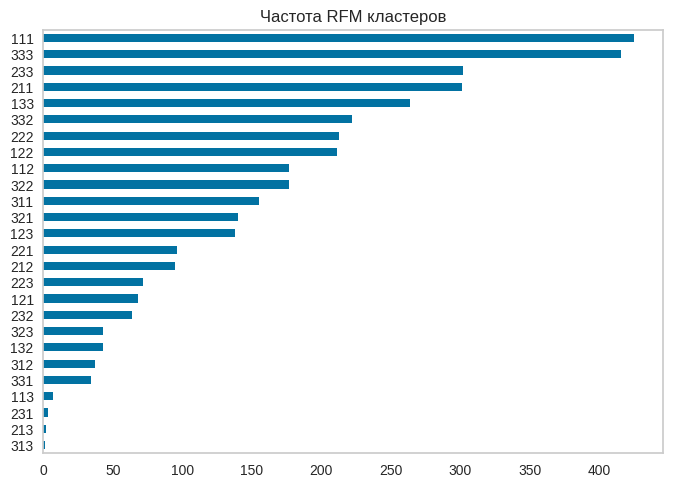

In [ ]:
df['RFM'].value_counts().sort_values().plot(kind='barh', title='Частота RFM кластеров', grid=False);

RFM-сегменты были разделены на 5 групп. Разбиение по этим группам можно видеть в ячейке внизу.  

Эти группы:

| Группа | Описание | Основные действия | Сегменты |
|---|---|---|---|
| VIP | Самые крутые клиенты, которые часто и много покупают | Подтвердить их VIP-статус, склонить к привлечению друзей и родственников | '111' |
| Loyal | Регулярно покупают | Делать VIP'ами | '121', '112', '122', '113' |
| Potential | Давно покупали, но часто и/или много | Привлечь, чтобы приходили чаще | '211', '221', '212', '222', '231' |
| New | Вероятно, только недавно начали закупаться в нашей сети | Следить, чтобы не стали потерянными клиентами, привлекать акциями общего характера | '133', '123', '132' |
| Lost potential | Очень давно что-то покупали, но часто и/или много | Вернуть супер-предложениями | '311', '312', '321', '331' |
| Lost, low potential | Очень давно покупали, и остальные показатели плохие | Зафиксировать, каким клиентам не интересна наша продукция | '333', '323', '332', '322', '313' |
| Low potential | Покупали не так давно, но остальные показатели плохие | Привлечь, чтобы приходили чаще. Узнать, может, этим клиентам нужны другие условия | '233', '232', '223', '213' |

\
Примечание: показатель суммы покупок важнее, чем частота покупок, поэтому, например, сегмент 231 в потенциальных, а 213 - в непотенциальных.

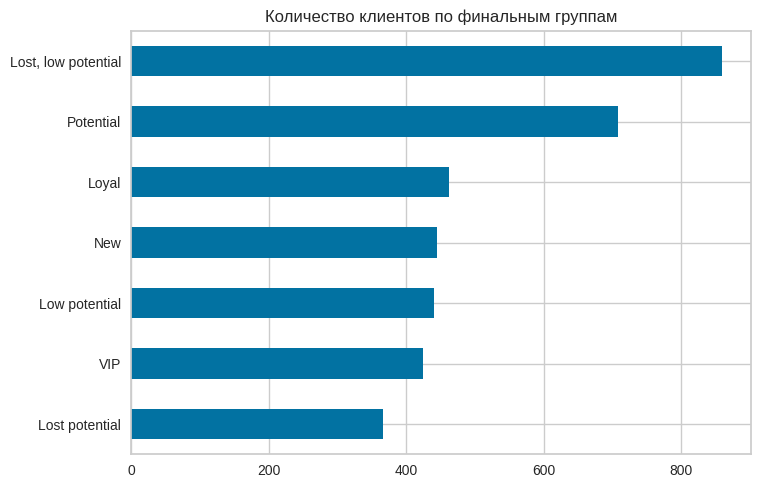

In [ ]:
rfm_groups = {
  'VIP' : ['111'],
  'Loyal' : ['121', '112', '122', '113'],
  'Potential' : ['211', '221', '212', '222', '231'],
  'New' : ['133', '123', '132'],
  'Lost potential' : ['311', '312', '321', '331'],
  'Lost, low potential' : ['333', '323', '332', '322', '313'],
  'Low potential' : ['233', '232', '223', '213']
  }

def invert_dict(dct):
  inv = {}
  for key, value_list in dct.items():
    for value in value_list:
      if value in inv.keys():
        raise ValueError(f'dictionary has repeating value of {value}')
      else:
        inv[value] = key
  return inv


df['group'] = df['RFM'].replace(invert_dict(rfm_groups))
df['group'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Количество клиентов по финальным группам');

In [ ]:
df.groupby('group').mean(numeric_only=True).T

group,VIP,Loyal,New,Potential,Low potential,Lost potential,"Lost, low potential"
insurance_flag,0.63,0.62,0.62,0.58,0.64,0.53,0.61
dti,0.44,0.43,0.40,0.41,0.37,0.38,0.35
full_age_child_number,0.60,0.51,0.46,0.56,0.53,0.64,0.50
dependant_number,0.00,0.00,0.00,0.00,0.01,0.01,0.00
period_at_work,66.13,51.85,42.34,61.02,50.52,75.62,55.57
max90days,2.60,2.16,1.76,1.59,1.08,1.32,0.97
max60days,1.69,1.42,1.19,1.07,0.79,0.94,0.77
max30days,1.10,0.92,0.83,0.77,0.62,0.65,0.62
max21days,0.71,0.60,0.56,0.52,0.49,0.44,0.54
max14days,0.53,0.44,0.46,0.41,0.41,0.37,0.47


### Описание кластеров (особенности и характеристики)

**VIP**
* самый высокий показатель debt-to-income - 0.44 в среднем
* больше всех запросов в бюро кредитных историй - в среднем 2.6 за 3 месяца
* самое большое количество активных аккаунтов - в среднем 4.2
* самое большое количество неактивных аккаунтов - в среднем 7.8
* самая высокая сумма платежей за последний месяц - в среднем 168 тысяч рублей
* самое высокое количество кредитов - в среднем 12
* чаще всего имеют просрочку - 83% клиентов
* чаще имеют второе высшее/ученую степень (наряду с Lost potential) - 24%
* чаще от 43 лет


**Loyal**
* раньше всех получали свой 1ый кредит - в среднем не позже 3 месяцев назад
* чаще до 28 лет
* треть клиентов не состоят в браке
* треть клиентов работает специалистами, вторая треть - менеджерами среднего звена

**New**
* меньше всех находятся на текущем месте работы - в среднем 42 дня
* реже всех используют залог - 19% клиентов
* самое низкое количество неактивных аккаунтов - в среднем 1.27
* самая низкая сумма платежей за последний месяц - в среднем 22 тысячи рублей
* часто имеют зарплатный счет - почти половина клиентов
* чаще до 28 лет

**Potential**
* получали свой последний кредит в банке в среднем 10 месяцев назад
* 1/5 клиентов имеют второе высшее/ученую степень
* трети клиент приходит зарплата на наш банковский счет
* чаще от 32 до 37 лет

**Low potential**
* реже всех применяют страхование заемщика - только 53% клиентов
* дольше всех находятся на текущем месте работы - в среднем 75 дней
* меньше всех средняя задержка в оплате - 1 час
* чаще всех используют залог - 45% клиентов
* чаще до 28 лет

**Lost potential**
* раньше всех получали свой 1ый кредит в банке - в среднем почти 7 лет назад
* чаще мужчина
* чаще имеют второе высшее/ученую степень (наряду с VIP) - 23%

**Lost, low potential**
* самый низкий показатель debt-to-income - 0.35 в среднем
* меньше всех запросов в бюро кредитных историй - в среднем 1 за 3 месяца
* самое низкое количество активных аккаунтов - в среднем 0.9

Отдельно можно отметить, что все кластеры чаще берут кредит на ремонт, имеют высшее образование, состоят в браке, не имеют банковского аккаунта, и работают специалистами в крупной компании, которая занимается торговлей.

## Общие выводы по кластеризации

KMeans выделил 3 кластера, каждый из которых обладает своими особенностями, что говорит о хорошей работе алгоритма.

RFM-анализ выделил 27 сегментов, которые пришлось обьединять в более крупные сегменты. Так, я выделил 7 групп исходя из бизнес-логики. К сожалению, одна из групп вообще не имела никаких особенностей - Potential. Также, у нескольких других групп было довольно мало особенностей.

Однако, это не говорит о том, что RFM-анализ явно хуже кластеризации по KMeans. RFM-анализ позволил сразу выделить группы клиентов, которые являются более перспективными для компании. Также, такая сегментации позволила выделить основные действия относительно этих групп еще до того, как был составлен портрет этих групп.